# KNN Lab 

**Objectives**:
1. Perform a train-test split on data.
1. Evaluate one KNN model using accuracy
and a confusion matrix.
1. Predict the lifestyle of a user based on body features

In [0]:
%run /Classroom-Setup

Mounting course-specific datasets to /mnt/training ... Datasets are already mounted to /mnt/training from s3a://databricks-corp-training/common

Out[88]: DataFrame[]

res5: Boolean = false

res6: Boolean = false

res7: Boolean = false

## Load the Data
The `Includes/Classroom-Setup` notebook has made an aggregate table of data
available to us via the Metastore associated with our workspace. We can load
the data as a pandas dataframe using the cell below.

This command loads the table using the Metastore reference. The `.toPandas()`
method converts the Spark DataFrame to a Pandas DataFrame. We will use the
Pandas DataFrame with Scikit-Learn throughout this Module.

In [0]:
from pyspark.sql.functions import *
ht_agg_spark_df = spark.read.table("ht_daily_metrics")
ht_agg_pandas_df =(ht_agg_spark_df.groupBy('device_id')
                  .agg(round(mean(col('bmi')),2).alias('mean_bmi'),
                  round(mean(col('vo2')),2).alias('mean_vo2'),
                  round(mean(col('resting_heartrate')),2).alias('mean_resting_heartrate'),
                  round(mean(col('active_heartrate')),2).alias('mean_active_heartrate'))).toPandas()

Join the feature table with the target table

In [0]:
users_table=spark.read.table('ht_users').toPandas()
device_lifestyle=users_table[['device_id','lifestyle']]
ht_agg_pandas_df=ht_agg_pandas_df.merge(device_lifestyle,'inner','device_id')
ht_agg_pandas_df.head(20)

,device_id,mean_bmi,mean_vo2,mean_resting_heartrate,mean_active_heartrate,lifestyle
0,fce425f2-e48a-11ea-8204-0242ac110002,25.97,30.31,73.85,141.77,Weight Trainer
1,fd2073e0-e48a-11ea-8204-0242ac110002,28.66,26.33,66.65,147.19,Sedentary
2,d5b6536a-e48a-11ea-8204-0242ac110002,28.07,30.51,61.54,115.35,Cardio Enthusiast
3,d62d31e2-e48a-11ea-8204-0242ac110002,24.27,33.01,60.13,109.56,Cardio Enthusiast
4,d72e7fc4-e48a-11ea-8204-0242ac110002,26.14,33.62,57.68,107.35,Athlete
5,da9cb91e-e48a-11ea-8204-0242ac110002,24.68,32.25,61.25,124.84,Athlete
6,dc1ca6a0-e48a-11ea-8204-0242ac110002,26.22,33.23,59.12,121.63,Weight Trainer
7,e05a010e-e48a-11ea-8204-0242ac110002,23.41,32.47,59.17,116.63,Cardio Enthusiast
8,e3238450-e48a-11ea-8204-0242ac110002,18.99,36.84,51.09,100.53,Cardio Enthusiast
9,e4f5dbe8-e48a-11ea-8204-0242ac110002,12.02,32.38,54.80,106.13,Cardio Enthusiast


## Preprocessing

Out[93]: <seaborn.axisgrid.PairGrid at 0x7f2e7fbcb520>

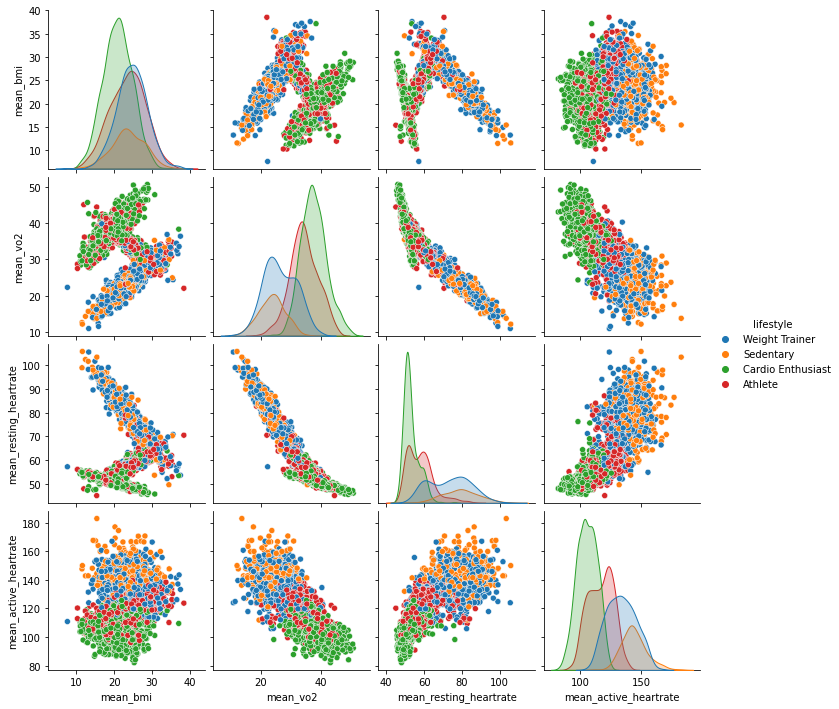

In [0]:
#analise the features
import seaborn as sns
from sklearn.svm import SVC
sns.pairplot(ht_agg_pandas_df[['mean_bmi','mean_vo2','mean_resting_heartrate','mean_active_heartrate','lifestyle']],hue='lifestyle')



In [0]:
#See if there is any null values.
ht_agg_pandas_df.isnull().sum()

Out[94]: device_id                 0
mean_bmi                  0
mean_vo2                  0
mean_resting_heartrate    0
mean_active_heartrate     0
lifestyle                 0
dtype: int64

In [0]:
#See if there is any outlier
ht_agg_pandas_df.describe()

,mean_bmi,mean_vo2,mean_resting_heartrate,mean_active_heartrate
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,22.902473,32.351577,62.266583,119.975807
std,4.492687,7.029760,12.521482,16.910297
min,7.590000,10.930000,45.050000,82.040000
25%,19.757500,27.337500,52.020000,106.580000
50%,22.910000,33.210000,58.530000,117.850000
75%,26.010000,37.415000,70.802500,131.760000
max,38.480000,50.750000,105.810000,182.960000


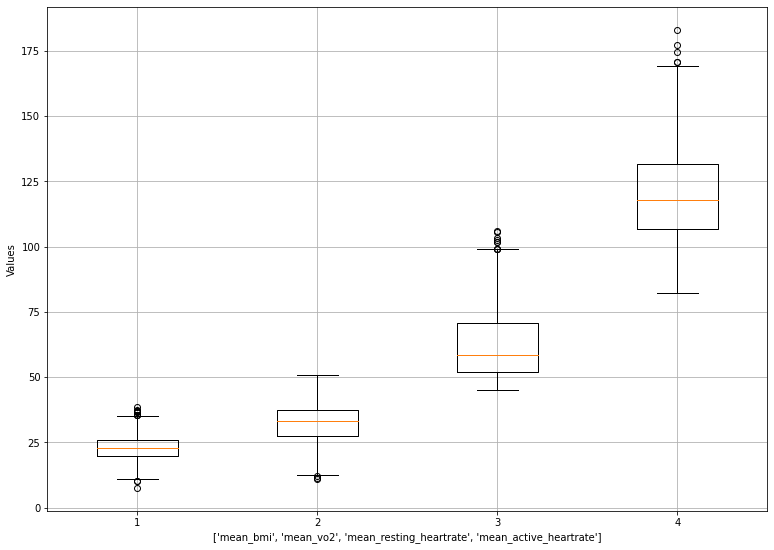

In [0]:
#Let's plot a blox plot for each feature
import matplotlib.pyplot as plt
data_1 = ht_agg_pandas_df['mean_bmi']
data_2 = ht_agg_pandas_df['mean_vo2']
data_3 = ht_agg_pandas_df['mean_resting_heartrate']
data_4 = ht_agg_pandas_df['mean_active_heartrate']
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1,1])
 
# Creating plot
bp = ax.boxplot(data)
ax.grid()
ax.set_xlabel(['mean_bmi','mean_vo2','mean_resting_heartrate','mean_active_heartrate'])
ax.set_ylabel('Values')
# show plot
plt.show()

Out[97]: Text(0.5, 1.0, 'Correlation Heatmap')

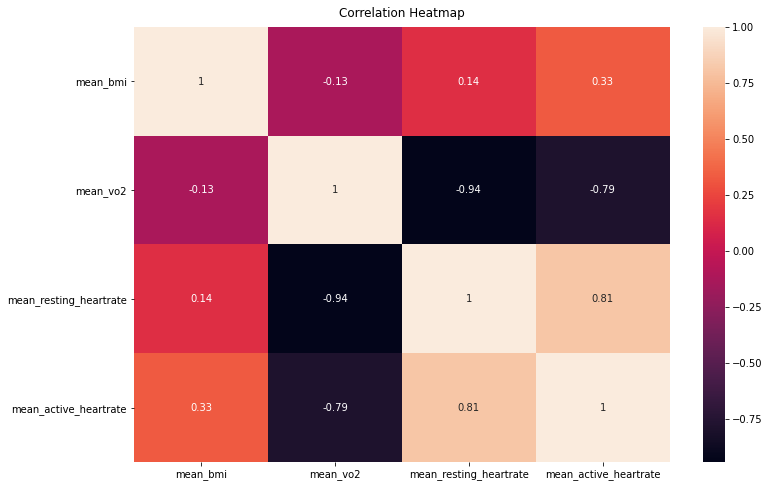

In [0]:
#Let's plot the correlation matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(ht_agg_pandas_df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10)

### Build the model

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#standarlize the features
sc=StandardScaler()
features1= ht_agg_pandas_df[['mean_active_heartrate', 'mean_bmi', 'mean_vo2', 'mean_resting_heartrate']]
features=sc.fit_transform(features1)

#encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(features,ht_agg_pandas_df['lifestyle'],test_size=0.2,random_state=42)
y_train_encoder=le.fit_transform(y_train)
y_test_encoder=le.transform(y_test)

* Hiperparameter optmization

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
KNN=KNeighborsClassifier()
#Find the best K using Grid Search
GS_KNN=GridSearchCV(KNN,{'n_neighbors': np.arange(1, 50)}, cv=3)
GS_KNN.fit(X_train,y_train_encoder)
#Predict Values
predict_train=GS_KNN.predict(X_train)
predict_test=GS_KNN.predict(X_test)
print('The best value K is',GS_KNN.best_params_)
print('Accuracy score in train is',accuracy_score(y_train_encoder,predict_train))
print('Accuracy score in test is',accuracy_score(y_test_encoder,predict_test))


The best value K is {'n_neighbors': 34}
Accuracy score in train is 0.6429166666666667
Accuracy score in test is 0.6166666666666667


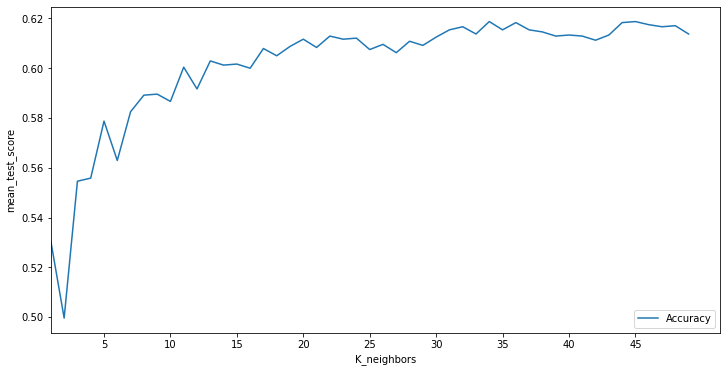

In [0]:
#plot the accuracy by changing the K feature
results=pd.DataFrame(GS_KNN.cv_results_)
plt.figure(figsize=(12,6))
plt.plot(results['param_n_neighbors'],results['mean_test_score'],label='Accuracy')
plt.xlabel('K_neighbors')
plt.ylabel('mean_test_score')
plt.xticks(np.arange(0, 50,5))
plt.xlim(xmin=1)
plt.legend(loc='lower right')
plt.show()

## Feature engineering

* Use PCA to reduce dimensionality Because there are two features with high correlation

* Apply again the KNN algorithm

In [0]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

print(np.sum(pca_model.explained_variance_ratio_))

0.9327124993753143


In [0]:
GS_KNN_pca=GridSearchCV(KNN,{'n_neighbors': np.arange(1, 100)}, cv=3)
GS_KNN_pca.fit(X_train_pca,y_train_encoder)
predict_train_pca=GS_KNN_pca.predict(X_train_pca)
predict_test_pca=GS_KNN_pca.predict(X_test_pca)
print('The best value K is',GS_KNN_pca.best_params_)
print('Accuracy score in train is',accuracy_score(y_train_encoder,predict_train_pca))
print('Accuracy score in test is',accuracy_score(y_test_encoder,predict_test_pca))


The best value K is {'n_neighbors': 49}
Accuracy score in train is 0.6116666666666667
Accuracy score in test is 0.6083333333333333


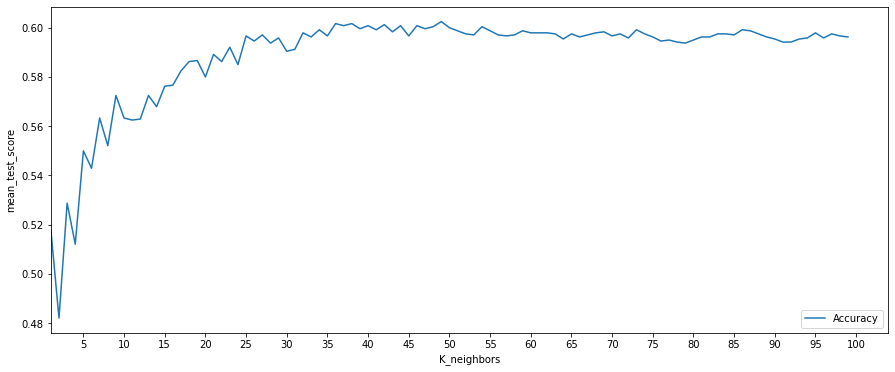

In [0]:
#plot the accuracy by changing the K feature
results_pca=pd.DataFrame(GS_KNN_pca.cv_results_)
plt.figure(figsize=(15,6))
plt.plot(results_pca['param_n_neighbors'],results_pca['mean_test_score'],label='Accuracy')
plt.xlabel('K_neighbors')
plt.ylabel('mean_test_score')
plt.xticks(np.arange(0, 105,5))
plt.xlim(xmin=1)
plt.legend(loc='lower right')
plt.show()

In [0]:
import pandas as pd
principalDf = pd.DataFrame(data = X_test_pca
             , columns = ['principal component 1', 'principal component 2'])
#Convert the predicted array in Lifestyle string again
y_lifestyle=le.inverse_transform(predict_test_pca)
final=pd.concat([principalDf,pd.Series(y_lifestyle).rename('Lifestyle_predict')],axis=1)
final.head(20)

,principal component 1,principal component 2,Lifestyle_predict
0,-1.582577,1.144920,Cardio Enthusiast
1,-1.063121,1.617176,Cardio Enthusiast
2,2.903424,1.378608,Weight Trainer
3,0.636995,-1.174961,Athlete
4,2.082285,0.076503,Weight Trainer
5,2.964128,1.365120,Sedentary
6,-0.772150,-0.189784,Cardio Enthusiast
7,1.219564,-1.194407,Weight Trainer
8,-0.264822,-0.724455,Athlete
9,1.131375,-2.024088,Athlete


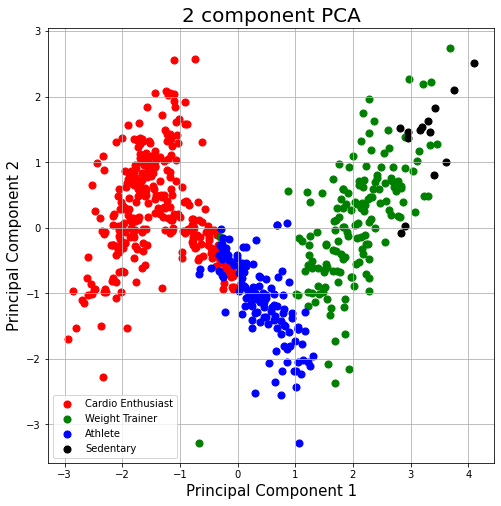

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cardio Enthusiast', 'Weight Trainer', 'Athlete','Sedentary']
colors = ['r', 'g', 'b','k']
for target, color in zip(targets,colors):
    indicesToKeep = final['Lifestyle_predict'] == target
    ax.scatter(final.loc[indicesToKeep, 'principal component 1']
               , final.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


* The result was good using only two features after the transformation of PCA, probably because of the high correlation of some features